In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import japanize_matplotlib

# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (4, 3)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

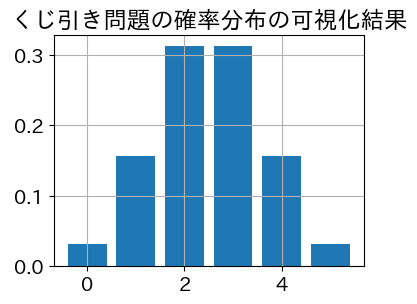

In [3]:
#
# 確率0.5であたるくじを5回引いたときの確率分布
#

from scipy.special import comb
n = 5
x = range(n+1)
y = [comb(n, i)/2**n for i in x]
plt.figure(figsize=(4, 3))
plt.bar(x, y)
plt.title('くじ引き問題の確率分布の可視化結果')

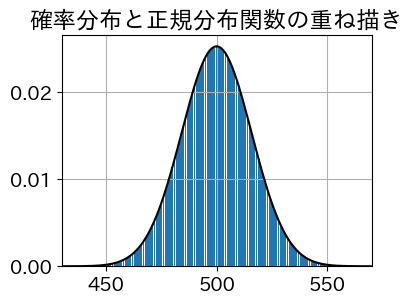

In [4]:
#
# サンプリング回数を増やす(n=1000)
#

# サンプリング数を増やしたとき正規分布に一致することが数学的証明されている

# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2) / (np.sqrt(2 * np.pi) * sigma)

n = 1000
plt.figure(figsize=(4, 3))
plt.xlim((430,570))
x = np.arange(430, 571)
y1 = [comb(n, i)/2**n for i in x]
plt.bar(x, y1)
mu = n/2
sigma = np.sqrt(mu/2)
y2 = norm(x, mu, sigma)
plt.plot(x, y2, c='k')

plt.title('確率分布と正規分布関数の重ね描き');

In [5]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.7.2
Running on ArviZ v0.15.1


In [6]:
# 確率モデルコンテキスト用インスタンス生成
model = pm.Model()

# 先ほど定義したインスタンスを用いてwith文でコンテキストを指定
with model:
    # Binomial: 二項分布の確率分布クラス
    # p: 二項分布の元になる試行の成功確率
    # n: 二項分布における試行回数
    # 'x':  確率変数 x のサンプル値を参照するときのラベル
    x = pm.Binomial('x', p=0.5, n=5)

In [7]:
#
# サンプリング
#

# with modelのコンテキスト定義により、
# 上で定義した確率モデルと紐付けられる
# sample_prior_predictive: 事前分布の予測値取得関数
# 乱数により生成されたサンプル値が変数prior_samplesにセットされる
with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [8]:
prior_samples

Inference data with groups:
	> prior

In [9]:
#
# Numpy形式でサンプル値を取得
#

# 事前分布(prior)としてのサンプル値を取得
x_samples = prior_samples['prior']['x'].values
print('type: ', type(x_samples))
print('shape: ', x_samples.shape)
print('values: ' , x_samples, '\n')

# 通常のNumPyデータとして頻度分析をした例
value_counts = pd.DataFrame(
    x_samples.reshape(-1)).value_counts().sort_index()
print(value_counts)

type:  <class 'numpy.ndarray'>
shape:  (1, 500)
values:  [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3

In [10]:
#
# ArviZによるサンプル値の集計
#

summary = az.summary(prior_samples, kind='stats')
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


- `hdi`: high density interval

Text(0.5, 1.0, 'ArviZによるサンプル値の可視化結果')

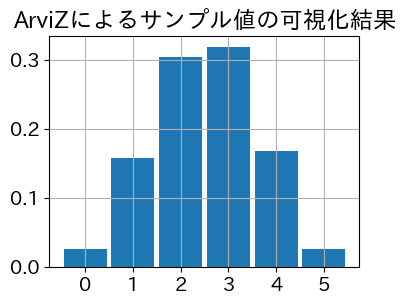

In [11]:
ax = az.plot_dist(x_samples)
ax.set_title('ArviZによるサンプル値の可視化結果')